a280_NNHwith2OPT

Iteration 10: Improved total distance to 1216.01
Iteration 531: Improved total distance to 1212.47
Iteration 841: Improved total distance to 1210.96
Iteration 851: Improved total distance to 1201.81
Iteration 866: Improved total distance to 1198.61
Iteration 1276: Improved total distance to 1198.30
Iteration 1753: Improved total distance to 1186.71
Iteration 2340: Improved total distance to 1185.12
Iteration 3044: Improved total distance to 1178.50
Iteration 3541: Improved total distance to 1172.35
Iteration 4288: Improved total distance to 1172.35
Iteration 4315: Improved total distance to 1166.62
Iteration 4318: Improved total distance to 1154.62
Iteration 4402: Improved total distance to 1137.08
Iteration 4668: Improved total distance to 1120.71
Iteration 6025: Improved total distance to 1118.03
Iteration 6108: Improved total distance to 1111.21
Iteration 6952: Improved total distance to 1110.99
Iteration 7022: Improved total distance to 1108.55
Iteration 9417: Improved total distan

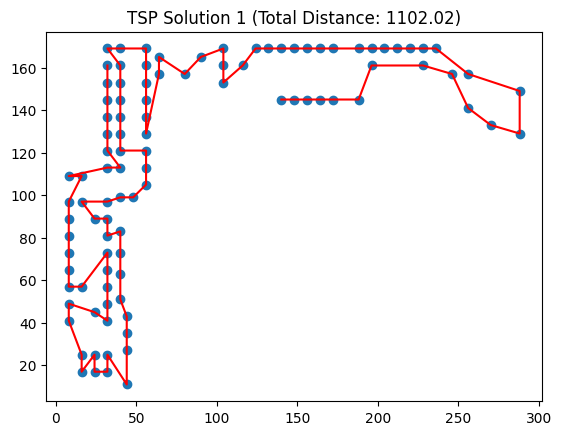

Iteration 192: Improved total distance to 1325.28
Iteration 193: Improved total distance to 1118.49
Iteration 1754: Improved total distance to 1102.49
Iteration 3460: Improved total distance to 1100.42
Iteration 3478: Improved total distance to 1026.32
Iteration 3490: Improved total distance to 1016.44


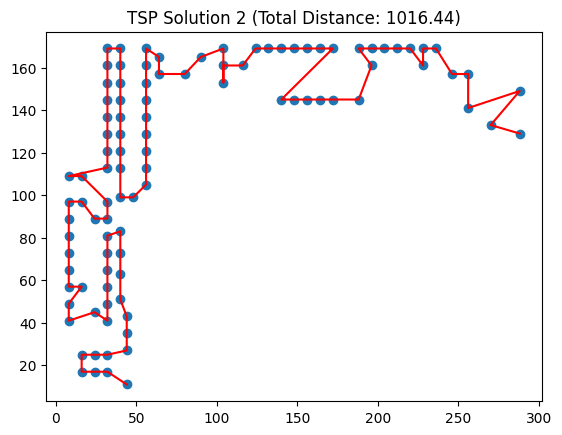

Iteration 904: Improved total distance to 1237.77
Iteration 937: Improved total distance to 1227.88
Iteration 2272: Improved total distance to 1226.38
Iteration 2282: Improved total distance to 1217.22
Iteration 2297: Improved total distance to 1214.02
Iteration 2617: Improved total distance to 1213.71
Iteration 2986: Improved total distance to 1202.12
Iteration 3429: Improved total distance to 1200.54
Iteration 3935: Improved total distance to 1193.91
Iteration 4661: Improved total distance to 1185.43
Iteration 4662: Improved total distance to 1109.35
Iteration 5389: Improved total distance to 1103.62
Iteration 6241: Improved total distance to 1102.66
Iteration 7800: Improved total distance to 1099.99
Iteration 7858: Improved total distance to 1093.16
Iteration 8427: Improved total distance to 1092.95
Iteration 8472: Improved total distance to 1090.50
Iteration 10949: Improved total distance to 1090.27
Iteration 15697: Improved total distance to 1086.18


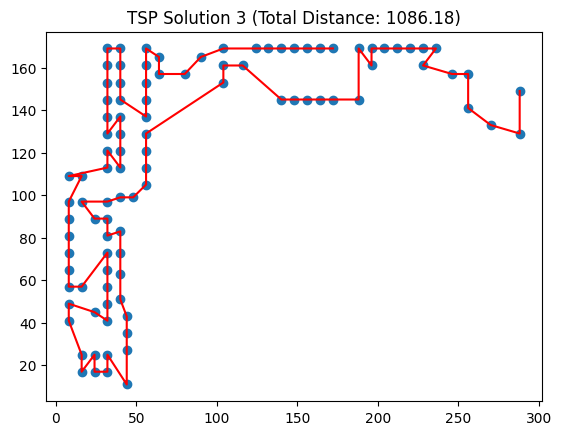

Iteration 285: Improved total distance to 1202.16
Iteration 660: Improved total distance to 1196.83
Iteration 2205: Improved total distance to 1192.50
Iteration 2681: Improved total distance to 1171.71
Iteration 3044: Improved total distance to 1170.39
Iteration 3243: Improved total distance to 1161.94
Iteration 3252: Improved total distance to 1161.83
Iteration 3745: Improved total distance to 1156.09
Iteration 4263: Improved total distance to 1139.71
Iteration 6962: Improved total distance to 1139.52
Iteration 7032: Improved total distance to 1134.32
Iteration 7171: Improved total distance to 1134.08
Iteration 7369: Improved total distance to 1129.99
Iteration 9012: Improved total distance to 1125.67
Iteration 9013: Improved total distance to 1123.45
Iteration 11775: Improved total distance to 1118.77
Iteration 11913: Improved total distance to 1112.14


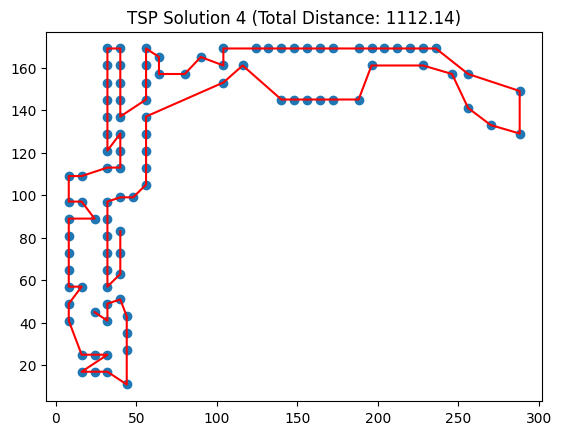

Iteration 63: Improved total distance to 1221.36
Iteration 109: Improved total distance to 1211.47
Iteration 1597: Improved total distance to 1209.96
Iteration 1607: Improved total distance to 1200.80
Iteration 1622: Improved total distance to 1197.61
Iteration 1987: Improved total distance to 1197.29
Iteration 2410: Improved total distance to 1185.70
Iteration 2925: Improved total distance to 1184.12
Iteration 3530: Improved total distance to 1177.49
Iteration 4053: Improved total distance to 1170.74
Iteration 4288: Improved total distance to 1170.74
Iteration 4315: Improved total distance to 1165.00
Iteration 4318: Improved total distance to 1153.00
Iteration 4402: Improved total distance to 1135.47
Iteration 4668: Improved total distance to 1119.09
Iteration 4763: Improved total distance to 1118.61
Iteration 4811: Improved total distance to 1114.16
Iteration 6581: Improved total distance to 1103.16
Iteration 7233: Improved total distance to 1100.49
Iteration 8077: Improved total dis

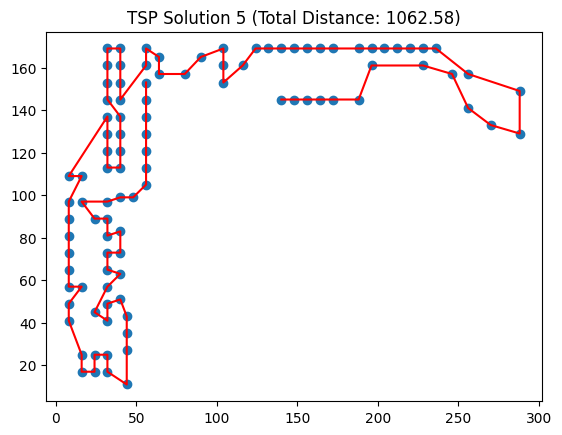

Average Tour Length: 1075.8698997492356


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []

# Rerun TSP solving process 5 times
for i in range(5):
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution {i+1} (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate and print average tour length
average_tour_length = np.mean(total_distances)
print("Average Tour Length:", average_tour_length)


a280_NNHonly

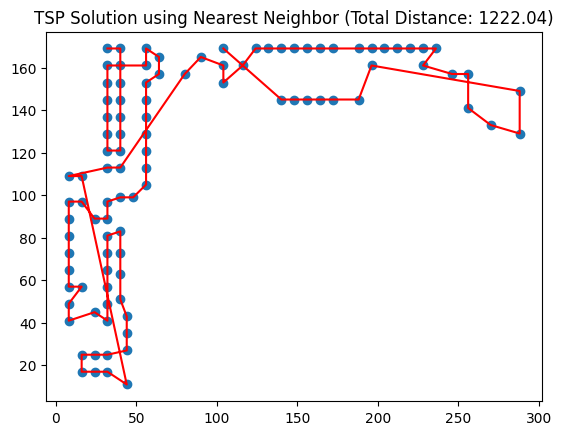

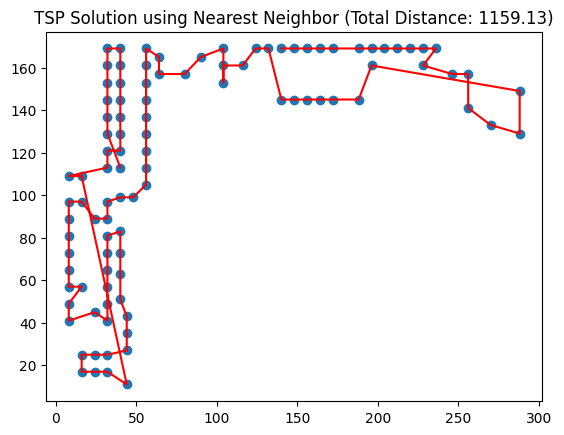

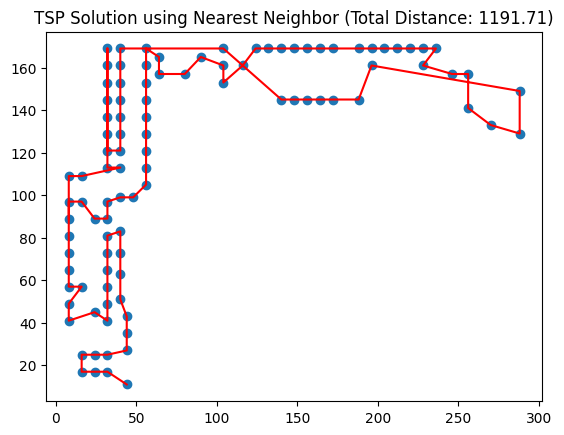

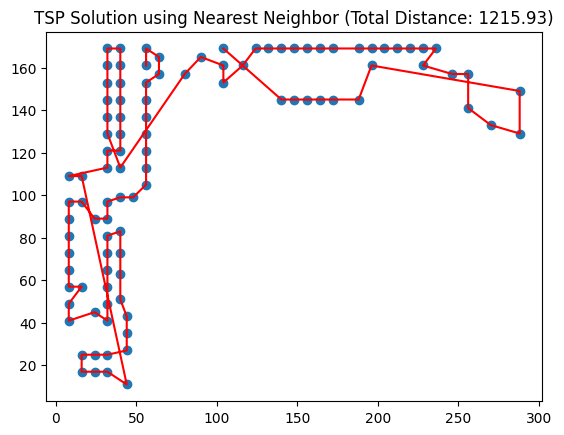

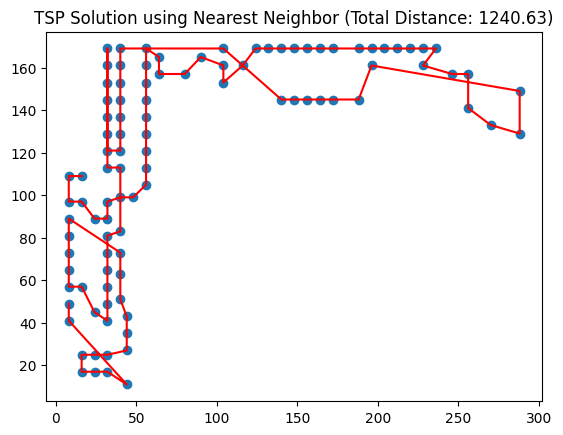

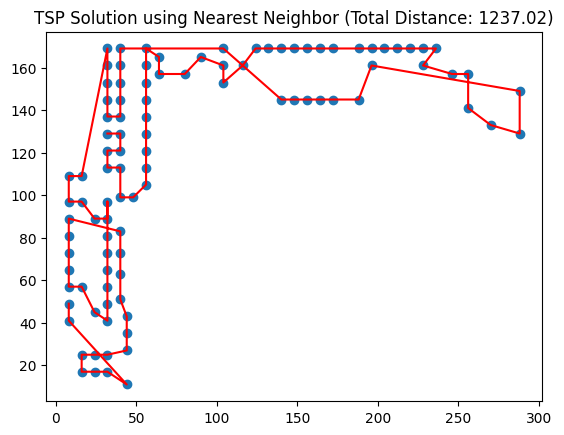

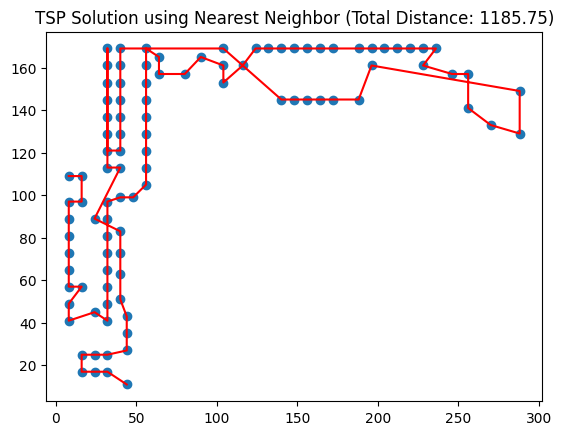

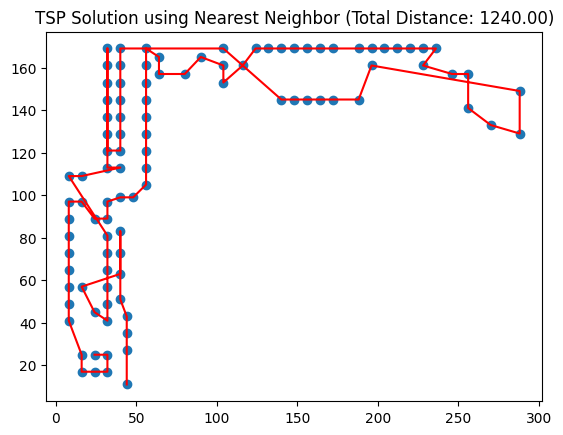

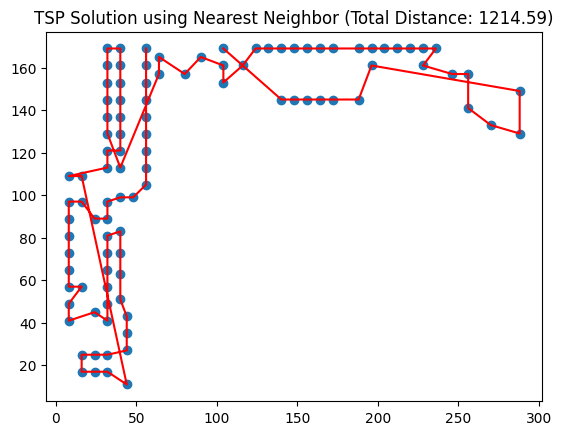

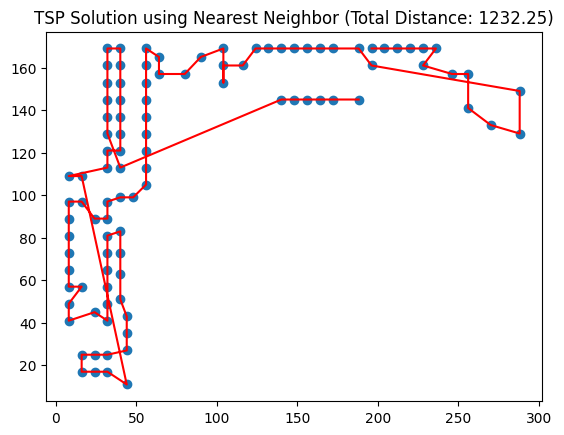

Average Tour Length: 1213.9063971271212


In [5]:
import re
import numpy as np
import matplotlib.pyplot as plt

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
for i in range(10):
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate average tour length
average_tour_length = np.mean(total_distances)
print("Average Tour Length:", average_tour_length)


a280_NNHwith3OPT

Iteration 51805: Improved total distance to 1191.12
Iteration 126549: Improved total distance to 1187.96
Iteration 146095: Improved total distance to 1172.17
Iteration 291607: Improved total distance to 1169.21
Iteration 411472: Improved total distance to 1162.49
Iteration 416147: Improved total distance to 1161.23
Iteration 416530: Improved total distance to 1140.15
Iteration 563590: Improved total distance to 1140.15
Iteration 563926: Improved total distance to 1136.05
Iteration 586837: Improved total distance to 1108.51


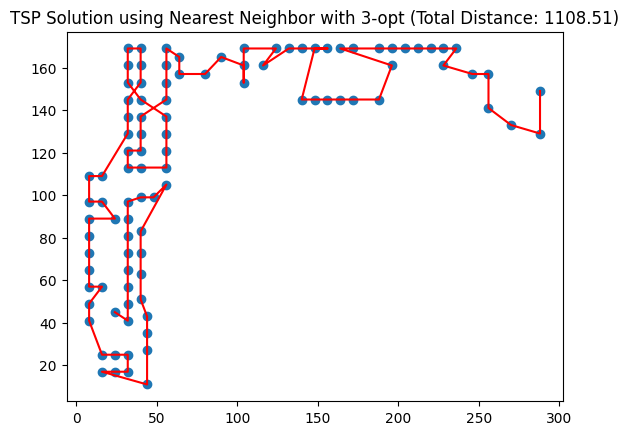

In [8]:
import re
import numpy as np
import matplotlib.pyplot as plt

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        new_tour = self.three_opt_swap(tour, i, j, k)
                        if self.total_distance(new_tour) < self.total_distance(tour):
                            tour = new_tour
                            improvement = True
                            print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor with 3-opt
solver = TSPSolver(city_coordinates)
solver.solve()

# Plot the solution
plt.scatter(solver.points[:, 0], solver.points[:, 1])
tour_points = np.array([solver.points[i] for i in solver.tour])
plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {solver.total_distance():.2f})')
plt.show()


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor with 3-opt
solver = TSPSolver(city_coordinates)
solver.solve()

# Plot the solution
plt.scatter(solver.points[:, 0], solver.points[:, 1])
tour_points = np.array([solver.points[i] for i in solver.tour])
plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {solver.total_distance():.2f})')
plt.show()
